In [4]:
#LINEAR REGRESSION FOR CUSTOMER ACQUISITION COSTS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


df = pd.read_csv('costs.csv')

y = df['cost']
X = df.drop('cost', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

onehot_cols = ['food_category','food_department','food_family','promotion_name','sales_country', 'marital_status', 'gender','occupation','houseowner','brand_name','store_type','store_city','store_state','media_type']
labelencoder_cols = ['education', 'member_card','avg. yearly_income']
numeric_cols = ['store_sales(in millions)', 'store_cost(in millions)','unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'SRP', 'gross_weight', 'net_weight','recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist']

ordinal_categories = [
    ["Partial High School", "High School Degree","Partial College" ,"Bachelors Degree", "Graduate Degree"], # for 'education'
    ["Normal", "Bronze", "Silver", "Golden"],                               # for 'member_card'
    ["$10K - $30K", "$30K - $50K", "$50K - $70K", "$70K - $90K", "$90K - $110K", "$110K - $130K","$130K - $150K", "$150K +"]           # for 'avg. yearly_income'
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories,
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1)

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
    ('ordinal', ordinal_encoder, labelencoder_cols),
    ('num', StandardScaler(), numeric_cols)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
print("Train R²:", pipeline.score(X_train, y_train))
print("Test R²:", pipeline.score(X_test, y_test))

Train R²: 0.3557989405930383
Test R²: 0.35216135304363916


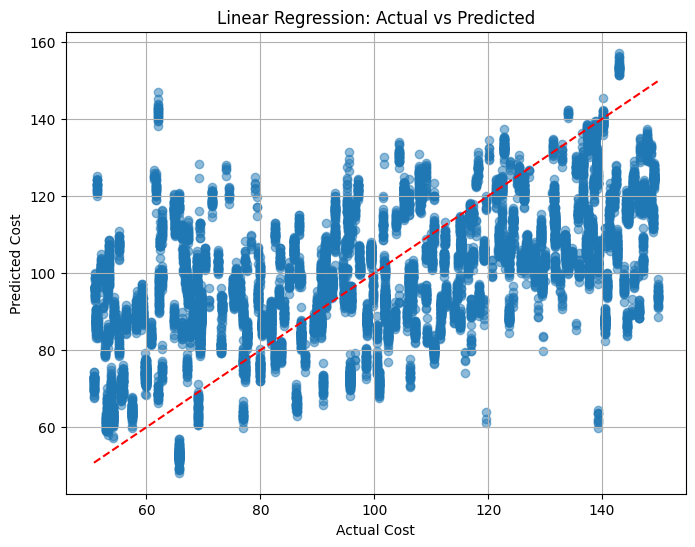

In [5]:
#VISUALIZATIONS

import matplotlib.pyplot as plt

y_pred = pipeline.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()



In [11]:
#LINEAR REGRESSION FOR CUSTOMER ACQUISITION COSTS, DROPPING FEATURES

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


df = pd.read_csv('costs.csv')

y = df['cost']
X = df.drop('cost', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df = df[df['media_type'].isin(['promotion_name','sales_country', 'houseowner','gender','occupation','education', 'member_card','avg. yearly_income','total_children', 'avg_cars_at home(approx)'])]

onehot_cols = ['promotion_name','sales_country', 'marital_status', 'gender','occupation','houseowner']
labelencoder_cols = ['education', 'member_card','avg. yearly_income']
numeric_cols = ['total_children', 'avg_cars_at home(approx)']

ordinal_categories = [
    ["Partial High School", "High School Degree","Partial College" ,"Bachelors Degree", "Graduate Degree"], # for 'education'
    ["Normal", "Bronze", "Silver", "Golden"],                               # for 'member_card'
    ["$10K - $30K", "$30K - $50K", "$50K - $70K", "$70K - $90K", "$90K - $110K", "$110K - $130K","$130K - $150K", "$150K +"]           # for 'avg. yearly_income'
]

ordinal_encoder = OrdinalEncoder(categories=ordinal_categories,
                                 handle_unknown='use_encoded_value',
                                 unknown_value=-1)

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols),
    ('ordinal', ordinal_encoder, labelencoder_cols),
    ('num', StandardScaler(), numeric_cols)
])

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate
print("Train R²:", pipeline.score(X_train, y_train))
print("Test R²:", pipeline.score(X_test, y_test))

Train R²: 0.2697540532736087
Test R²: 0.26362554343733335


In [6]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

# Use the same preprocessor
pipeline_nn = Pipeline([
    ('preprocessing', preprocessor),
    ('model', MLPRegressor(
        hidden_layer_sizes=(64, 32),  # two hidden layers
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=0
    ))
])

# Fit the neural network
pipeline_nn.fit(X_train, y_train)

# Evaluate performance
print("Neural Net Train R²:", pipeline_nn.score(X_train, y_train))
print("Neural Net Test R²:", pipeline_nn.score(X_test, y_test))

Neural Net Train R²: 0.9998497336079467
Neural Net Test R²: 0.9976692906576021


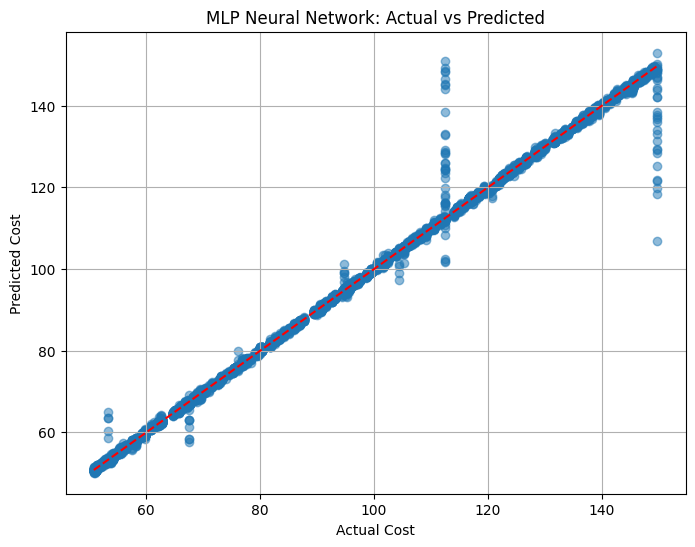

In [10]:
#VISUALIZATIONS

import matplotlib.pyplot as plt

y_pred = pipeline_nn.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("MLP Neural Network: Actual vs Predicted")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.show()
